In [17]:
import os
import sys
from pathlib import Path
from matplotlib import pyplot as plt

import polars as pl

sys.path.append(os.path.abspath(".."))

project_root = Path.cwd().parent
data_csv_path = project_root / "data" / "raw" / "job_market.csv"

df = pl.read_csv(str(data_csv_path))

In [18]:
from src.data.preprocessing import preprocess

df = preprocess(df, "job_market")

In [19]:
df.head(5)

experience_required,salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown,job_title_mte,company_mte,location_mte,Docker,Ruby,MongoDB,Java,JavaScript,Go,Kubernetes,Node.js,Machine Learning,AWS,TensorFlow,React,Git,Agile,CI/CD,SQL,REST APIs,Python,TypeScript
f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
7.0,202953.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,130487.73913,155055.5,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
9.0,200362.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130429.275,153501.153846,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
8.0,197964.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130487.73913,155055.5,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0
11.0,196812.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161961.5,130487.73913,155055.5,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1
11.0,196292.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,128877.0,153501.153846,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [20]:
from src.data.feature_engineering import aggregate_skills

df = aggregate_skills(df)

In [21]:
df.head(5)

experience_required,salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown,job_title_mte,company_mte,location_mte,Docker,Ruby,MongoDB,Java,JavaScript,Go,Kubernetes,Node.js,Machine Learning,AWS,TensorFlow,React,Git,Agile,CI/CD,SQL,REST APIs,Python,TypeScript,backend_skills,frontend_skills,db_skills,ml_skills,infra_skills,tools_skills
f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
7.0,202953.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,130487.73913,155055.5,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,3
9.0,200362.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130429.275,153501.153846,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,2
8.0,197964.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130487.73913,155055.5,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,1,1,1,3,0
11.0,196812.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161961.5,130487.73913,155055.5,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1,2,1,0,1,2,1
11.0,196292.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,128877.0,153501.153846,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0


In [22]:
from src.data.feature_engineering import add_skill_count

df = add_skill_count(df)

In [23]:
df.head(5)

experience_required,salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown,job_title_mte,company_mte,location_mte,Docker,Ruby,MongoDB,Java,JavaScript,Go,Kubernetes,Node.js,Machine Learning,AWS,TensorFlow,React,Git,Agile,CI/CD,SQL,REST APIs,Python,TypeScript,backend_skills,frontend_skills,db_skills,ml_skills,infra_skills,tools_skills,skill_count
f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
7.0,202953.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,130487.73913,155055.5,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,3,5
9.0,200362.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130429.275,153501.153846,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,2,5
8.0,197964.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130487.73913,155055.5,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,1,1,1,3,0,7
11.0,196812.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161961.5,130487.73913,155055.5,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1,2,1,0,1,2,1,7
11.0,196292.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,128877.0,153501.153846,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,3


In [24]:
from src.data.feature_engineering import drop_all_skill_cols

df = drop_all_skill_cols(df)

In [25]:
df.head(5)

experience_required,salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown,job_title_mte,company_mte,location_mte,backend_skills,frontend_skills,db_skills,ml_skills,infra_skills,tools_skills,skill_count
f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8
7.0,202953.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,130487.73913,155055.5,0,1,0,0,1,3,5
9.0,200362.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130429.275,153501.153846,1,1,0,0,1,2,5
8.0,197964.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130487.73913,155055.5,1,1,1,1,3,0,7
11.0,196812.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161961.5,130487.73913,155055.5,2,1,0,1,2,1,7
11.0,196292.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,128877.0,153501.153846,2,0,0,1,0,0,3


array([[<Axes: title={'center': 'skill_count'}>]], dtype=object)

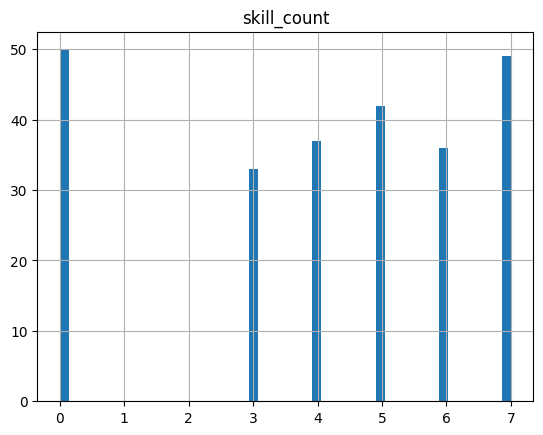

In [34]:
df.select("skill_count").to_pandas().hist(bins=50)

In [26]:
from src.data.feature_engineering import add_experience_features

df = add_experience_features(df)

c:\Users\User\OneDrive\Документы\PyProjects\job-market-ml-service\src\data\feature_engineering.py:42: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("experience_required").map_elements(np.log1p)
with this one instead:
  + pl.col("experience_required").log1p()

  .map_elements(np.log1p)


In [27]:
df.head(5)

experience_required,salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown,job_title_mte,company_mte,location_mte,backend_skills,frontend_skills,db_skills,ml_skills,infra_skills,tools_skills,skill_count,experience_sq,experience_log
f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,f64,f64
7.0,202953.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,130487.73913,155055.5,0,1,0,0,1,3,5,49.0,2.079442
9.0,200362.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130429.275,153501.153846,1,1,0,0,1,2,5,81.0,2.302585
8.0,197964.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130487.73913,155055.5,1,1,1,1,3,0,7,64.0,2.197225
11.0,196812.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161961.5,130487.73913,155055.5,2,1,0,1,2,1,7,121.0,2.484907
11.0,196292.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,128877.0,153501.153846,2,0,0,1,0,0,3,121.0,2.484907


In [28]:
from src.data.feature_engineering import drop_experience_required_col

df = drop_experience_required_col(df)

In [29]:
df.head(5)

salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown,job_title_mte,company_mte,location_mte,backend_skills,frontend_skills,db_skills,ml_skills,infra_skills,tools_skills,skill_count,experience_sq,experience_log
f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,f64,f64
202953.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,130487.73913,155055.5,0,1,0,0,1,3,5,49.0,2.079442
200362.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130429.275,153501.153846,1,1,0,0,1,2,5,81.0,2.302585
197964.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130487.73913,155055.5,1,1,1,1,3,0,7,64.0,2.197225
196812.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161961.5,130487.73913,155055.5,2,1,0,1,2,1,7,121.0,2.484907
196292.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,128877.0,153501.153846,2,0,0,1,0,0,3,121.0,2.484907


array([[<Axes: title={'center': 'experience_sq'}>]], dtype=object)

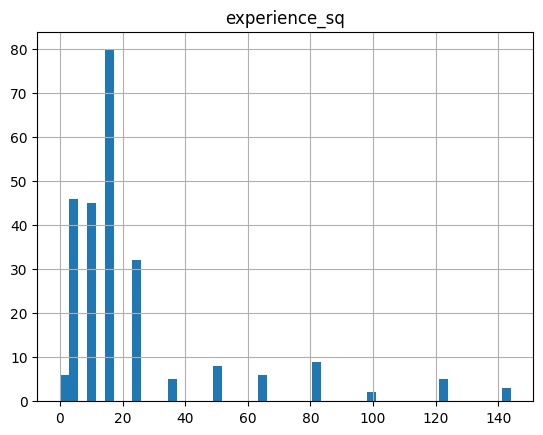

In [30]:
df.select("experience_sq").to_pandas().hist(bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x1faff4fd1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1faff984f80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1faff984710>],
 'medians': [<matplotlib.lines.Line2D at 0x1faff985580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1faff9858b0>],
 'means': []}

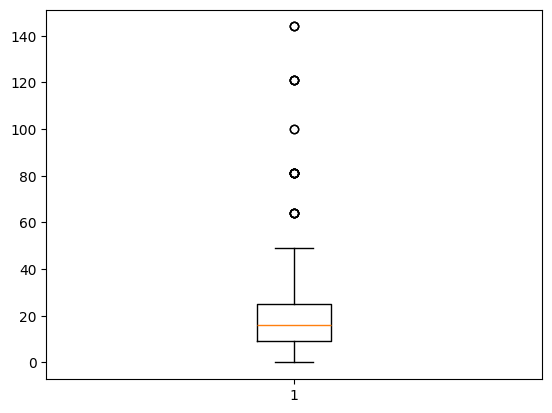

In [31]:
plt.boxplot(df["experience_sq"].to_pandas(), vert=True)

array([[<Axes: title={'center': 'experience_log'}>]], dtype=object)

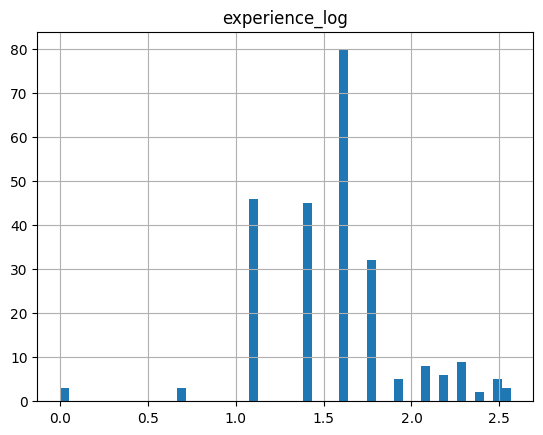

In [32]:
df.select("experience_log").to_pandas().hist(bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x1faff871400>,
 'caps': [<matplotlib.lines.Line2D at 0x1faff8719d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1faff871100>],
 'medians': [<matplotlib.lines.Line2D at 0x1faff871f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1faff872240>],
 'means': []}

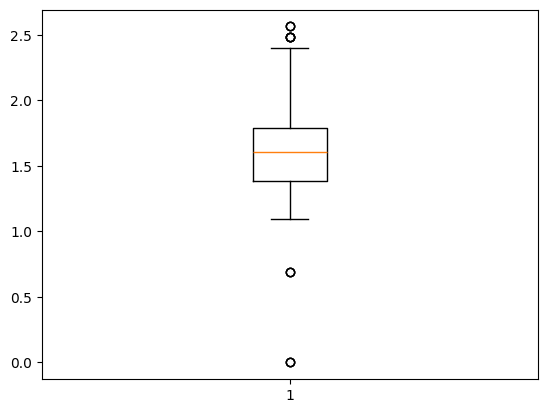

In [33]:
plt.boxplot(df["experience_log"].to_pandas(), vert=True)